In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix
import seaborn as sns
tf.random.set_seed(3)

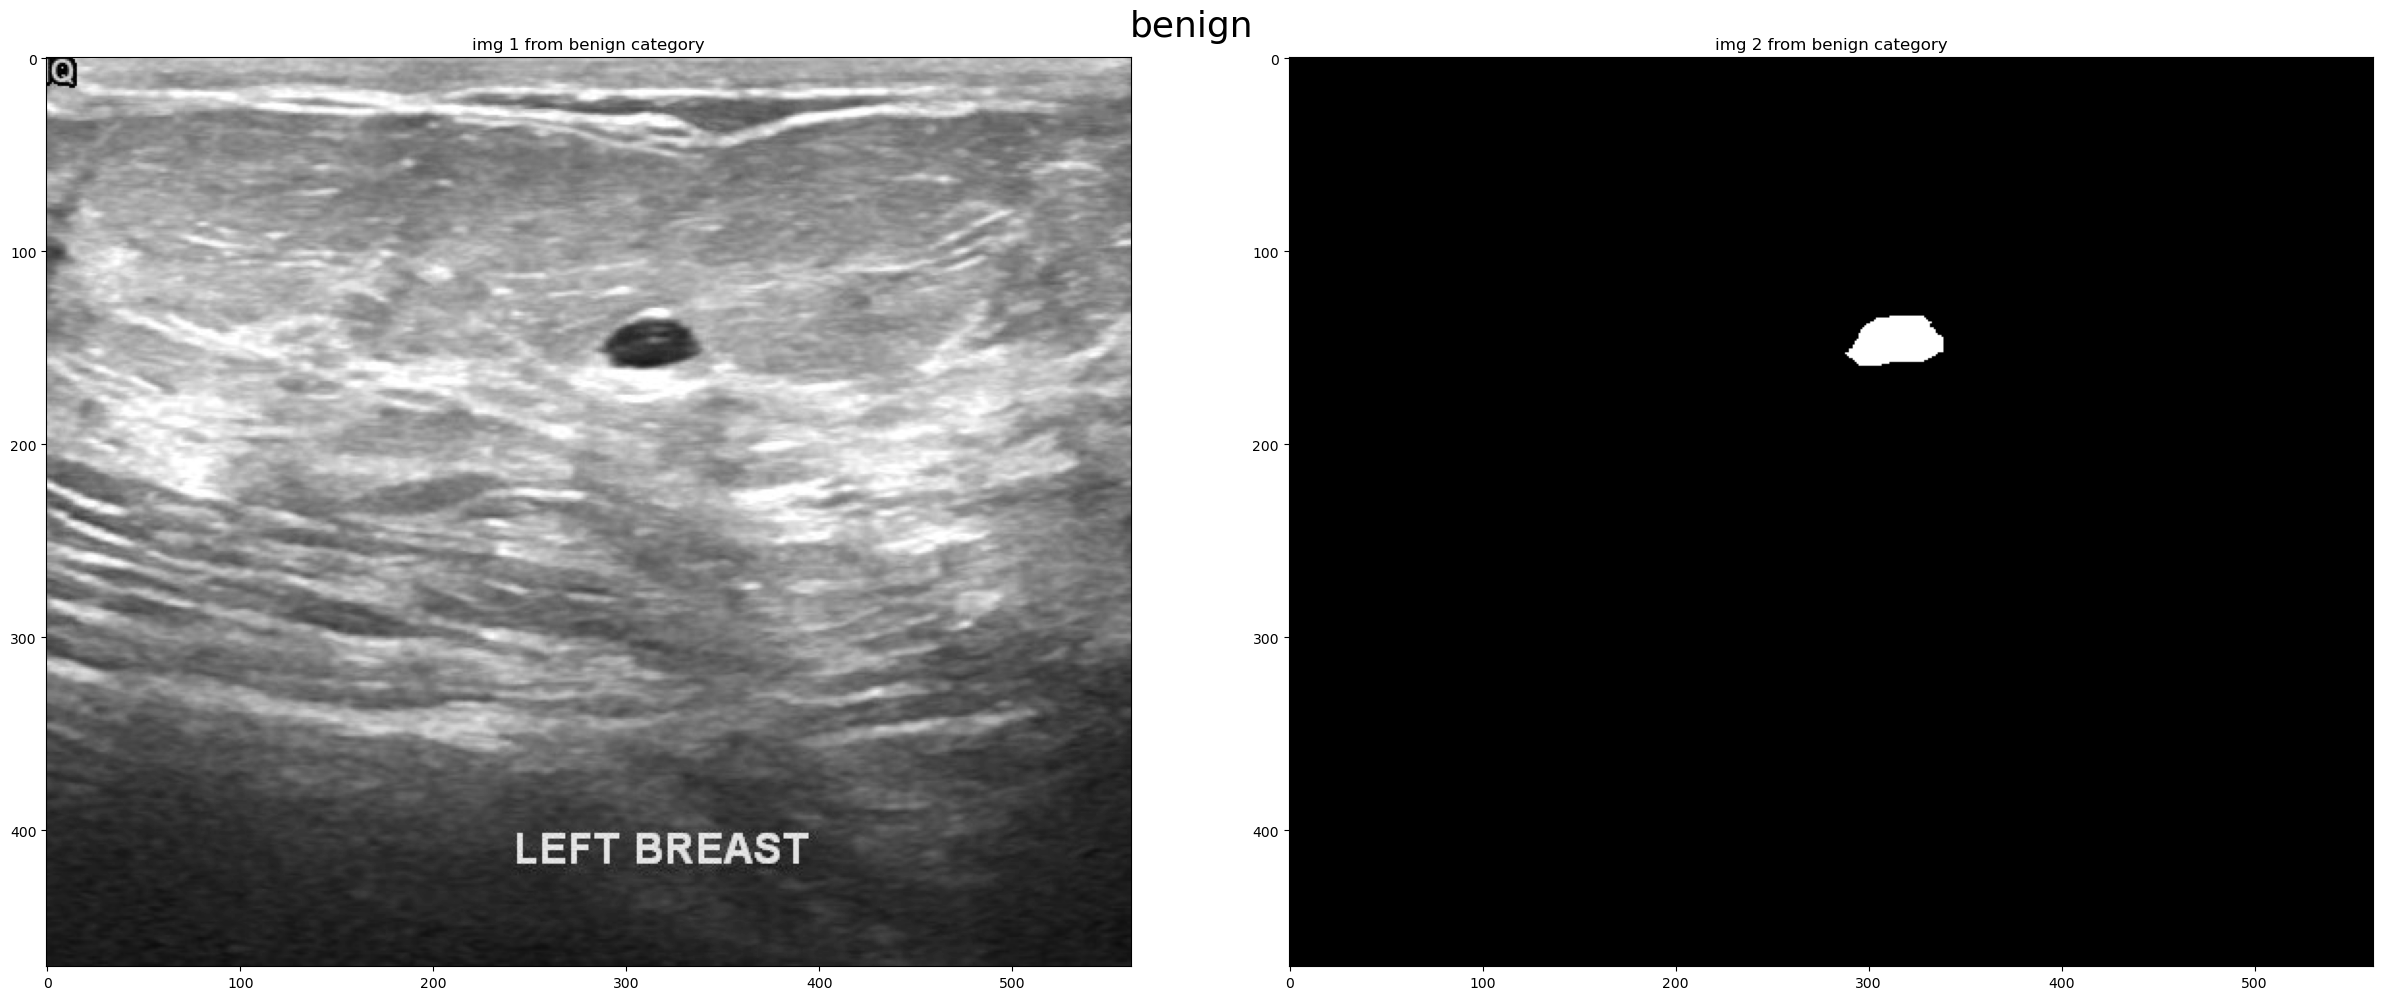

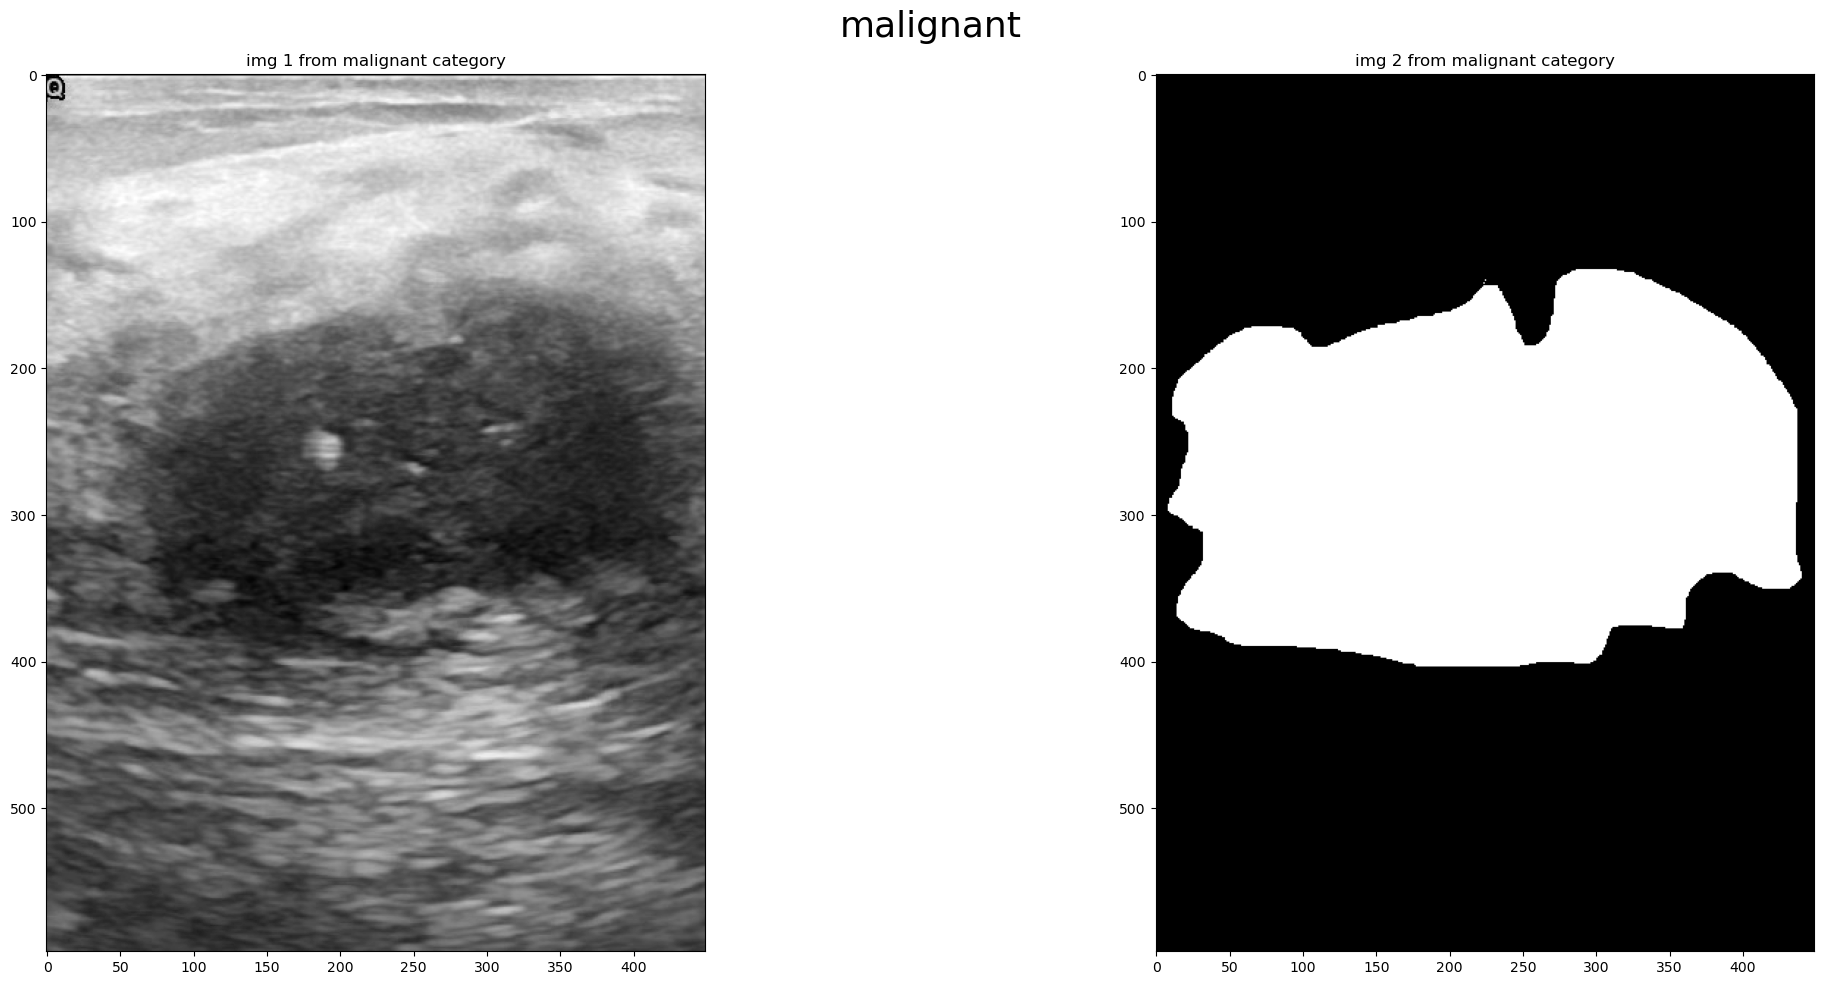

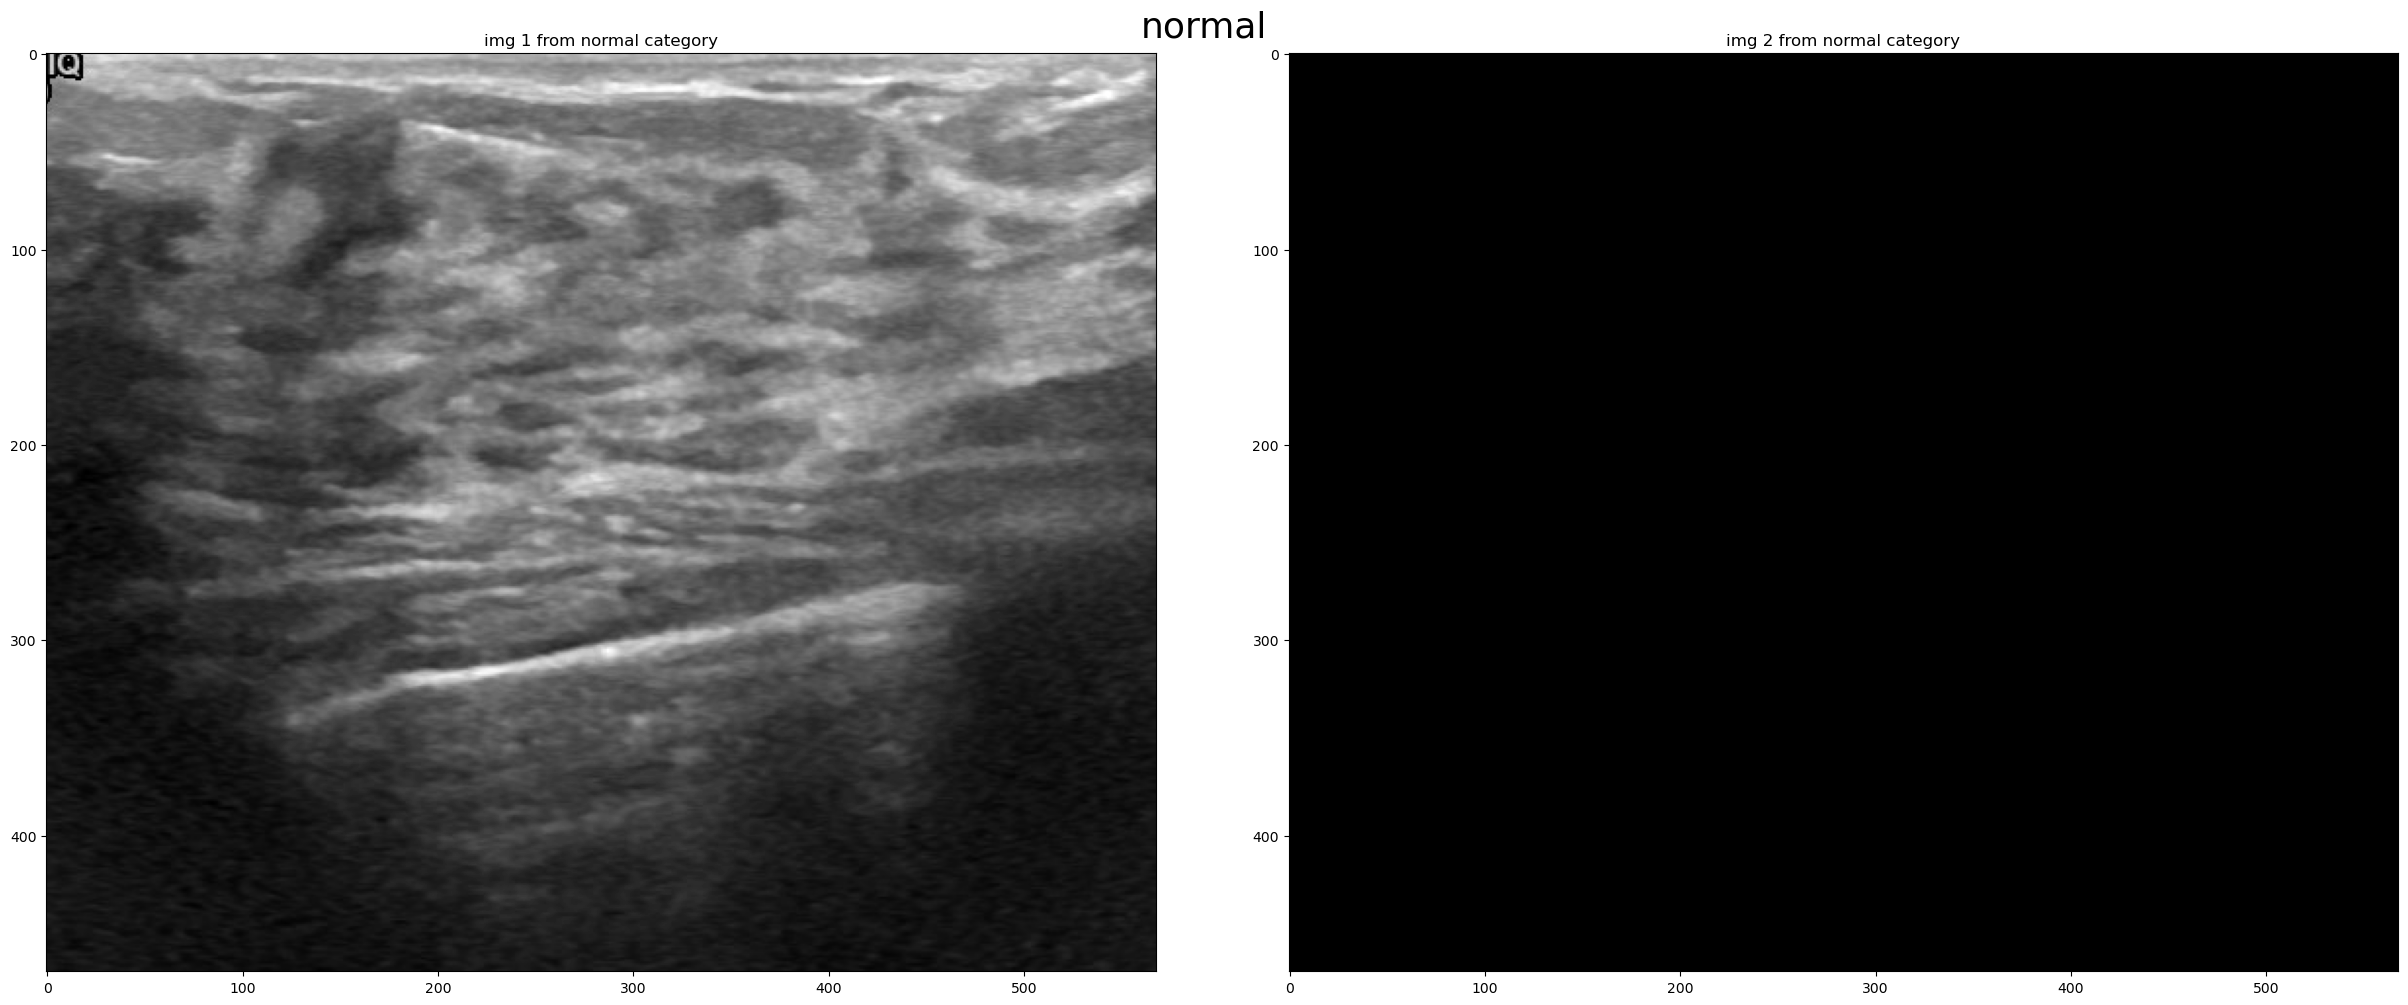

In [33]:
folder_name = 'C:\learningwith_python_project\Breast Ultrasound Images Dataset\Dataset_BUSI_with_GT\Dataset_BUSI_with_GT'
files_names = ['benign', 'malignant', 'normal']

for file in files_names:
    path = os.path.join(folder_name, file)
    x = 0
    fig, axes = plt.subplots(1,2, figsize=(25, 10))  
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        axes[x].imshow(img_array, cmap='gray')
        axes[x].set_title(f"img {x+1} from {file} category")
        x += 1
        if x == 2: 
            break

    plt.suptitle(file, fontsize=26)
    plt.tight_layout()
    plt.show()

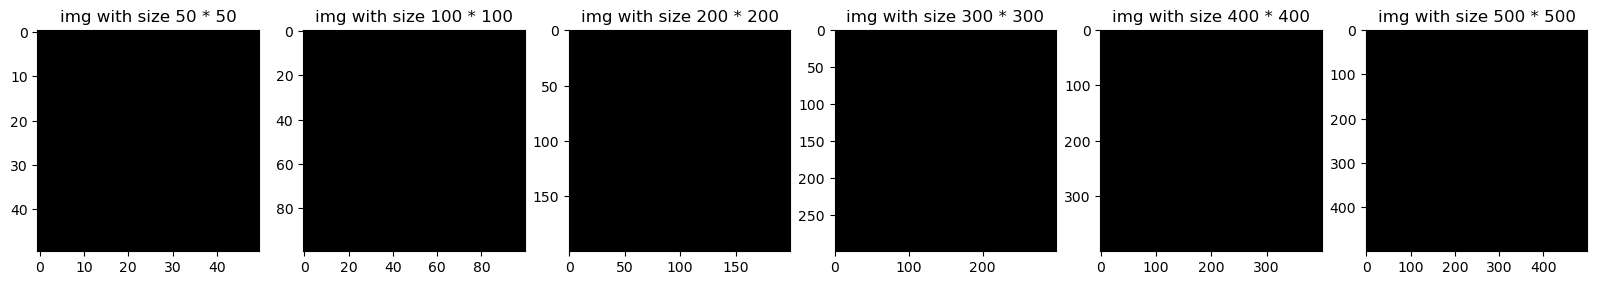

In [34]:
img_sz = [50, 100, 200, 300, 400, 500]
plt.figure(figsize=(20, 5))

for i, sz in enumerate(img_sz):
    new_array = cv2.resize(img_array, (sz, sz))
    plt.subplot(1, len(img_sz), i+1)
    plt.imshow(new_array, cmap='gray')
    plt.title(f"img with size {sz} * {sz}")

plt.show()

In [35]:
#size (300*300) is okay
img_sz=300

In [36]:
training_data = []

def create_training_data():
    for file in files_names:
        path = os.path.join(folder_name, file)
        class_num = files_names.index(file)
        print(file,class_num)
        
        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_sz, img_sz))  
            training_data.append([new_array, class_num])

create_training_data()

benign 0


100%|██████████| 891/891 [00:09<00:00, 96.48it/s] 


malignant 1


100%|██████████| 421/421 [00:04<00:00, 92.64it/s]


normal 2


100%|██████████| 266/266 [00:03<00:00, 85.68it/s]


In [37]:
for i in range(5):
    print("Class number for image", i+1, ":", training_data[i][1])

Class number for image 1 : 0
Class number for image 2 : 0
Class number for image 3 : 0
Class number for image 4 : 0
Class number for image 5 : 0


In [38]:
for i in range(-1, -6, -1):
    print("Class number for image", len(training_data) + i + 1, ":", training_data[i][1])

Class number for image 1578 : 2
Class number for image 1577 : 2
Class number for image 1576 : 2
Class number for image 1575 : 2
Class number for image 1574 : 2


In [39]:
random.shuffle(training_data)

for i in range(30):
    print(f"Sample {i+1}:")
    print("Class number:", training_data[i][1],"\n") 

Sample 1:
Class number: 0 

Sample 2:
Class number: 1 

Sample 3:
Class number: 0 

Sample 4:
Class number: 0 

Sample 5:
Class number: 2 

Sample 6:
Class number: 0 

Sample 7:
Class number: 1 

Sample 8:
Class number: 1 

Sample 9:
Class number: 0 

Sample 10:
Class number: 2 

Sample 11:
Class number: 1 

Sample 12:
Class number: 0 

Sample 13:
Class number: 0 

Sample 14:
Class number: 1 

Sample 15:
Class number: 1 

Sample 16:
Class number: 0 

Sample 17:
Class number: 0 

Sample 18:
Class number: 0 

Sample 19:
Class number: 0 

Sample 20:
Class number: 2 

Sample 21:
Class number: 2 

Sample 22:
Class number: 0 

Sample 23:
Class number: 1 

Sample 24:
Class number: 0 

Sample 25:
Class number: 1 

Sample 26:
Class number: 0 

Sample 27:
Class number: 0 

Sample 28:
Class number: 0 

Sample 29:
Class number: 1 

Sample 30:
Class number: 0 



In [40]:
X=[]
y=[]

for feature,label in training_data:
    X.append(feature)
    y.append(label)


X=np.array(X)
y=np.array(y)

In [41]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(1578, 300, 300)
(1578,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1262, 300, 300)
(1262,)
(316, 300, 300)
(316,)


In [43]:
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2]
[0 1 2]


In [44]:
X_train = X_train/255
X_test = X_test/255

In [45]:
print(X_train[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


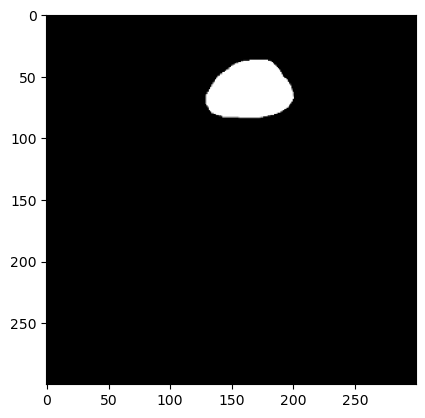

In [46]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [47]:
# NN

In [48]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(img_sz,img_sz)),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(16, activation='relu'),
                          keras.layers.Dense(8, activation='relu'),
                          keras.layers.Dense(3, activation='sigmoid')
])

c:\Users\Wasutha.J\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
history=model.fit(X_train, y_train, epochs=10,validation_split=0.1)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - accuracy: 0.5486 - loss: 2.8276 - val_accuracy: 0.5433 - val_loss: 0.9353
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 218ms/step - accuracy: 0.5932 - loss: 0.8657 - val_accuracy: 0.6693 - val_loss: 0.8882
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 219ms/step - accuracy: 0.7004 - loss: 0.7860 - val_accuracy: 0.6929 - val_loss: 0.7812
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 210ms/step - accuracy: 0.7237 - loss: 0.7165 - val_accuracy: 0.6850 - val_loss: 0.7728
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 210ms/step - accuracy: 0.7087 - loss: 0.6691 - val_accuracy: 0.7087 - val_loss: 0.6955
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - accuracy: 0.7298 - loss: 0.6057 - val_accuracy: 0.6850 - val_loss: 0.7310
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 220ms/step - accuracy: 0.7352 - loss: 0.6003 - val_accuracy: 0.7087 - val_loss: 0.8276
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 210ms/step - accuracy: 0.7443 - loss: 0.5802 - val_accuracy: 0

In [51]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuarcy of the model is : {accuracy*100:.2f} %")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6860 - loss: 0.9184
Accuarcy of the model is : 68.99 %


In [52]:
y_pred=model.predict(X_test)
print(y_pred[0])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[0.99716896 0.63471764 0.5457772 ]


In [53]:
y_pred = [np.argmax(i) for i in y_pred]
print(y_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0]


In [54]:
comparison_df = pd.DataFrame({ 'Actual': y_test,'Predicted': y_pred})

print(comparison_df[:20])

    Actual  Predicted
0        0          0
1        1          0
2        0          0
3        1          0
4        0          0
5        0          0
6        2          0
7        0          0
8        0          0
9        1          1
10       0          0
11       0          0
12       1          1
13       1          1
14       0          0
15       1          0
16       0          0
17       1          0
18       0          0
19       2          0


In [55]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

tf.Tensor(
[[160  16   0]
 [ 56  34   0]
 [ 25   1  24]], shape=(3, 3), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

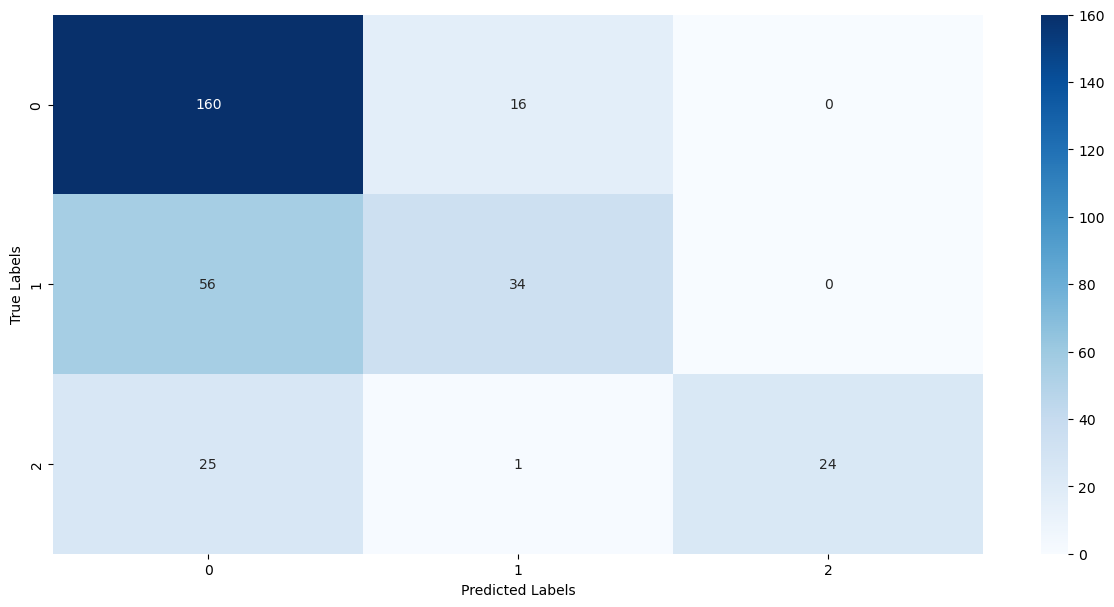

In [56]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.91      0.77       176
           1       0.67      0.38      0.48        90
           2       1.00      0.48      0.65        50

    accuracy                           0.69       316
   macro avg       0.78      0.59      0.63       316
weighted avg       0.72      0.69      0.67       316

